# Imports

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

# 1 Apprentissage des paramètres d’un modèle à partir de données

## Question 1. : A partir de cette séquence d’observation : S, S, S, I, I ,I ,I , I, I, R

### Estimez de les probabilités de transition entre les états:

### Dresser la matrice de probabilité de transitions:

|     | S   | I   | R   |
|:---:|:---:|:---:|:---:|
| S   | 2/3 | 1/3 |  0  |
| I   | 0   | 5/6 | 1/6 |
| R   | 0   | 0   | 1   |

## Question 1. : Lire des données

In [2]:
df = np.loadtxt('data_exo1.txt', dtype=int)

## Question  2. : Estimez les probabilités de transition entre les états et dressez la matrice de probabilité de transitions

In [3]:
def get_transaction_matrix(dataFrame):
    '''
    Fonction qui calcule les probabilités de transition entre les états
    Argument : DataFrame dans notre cas la liste d'entier obtenue à partir du fichier txt
    Retrun : la matrice de transition
    '''
    main_matrix = np.zeros((3,3))
    # calculer le nombre de chaque transition entre chaque états
    for individu in dataFrame:
        for i in range(0, len(individu) - 1):
            main_matrix[individu[i]][individu[i + 1]] += 1

    # calculer les probabilités de transitions
    for i in range(3):
        sum_line = sum(main_matrix[i])
        for j in range(3):
            main_matrix[i][j] = main_matrix[i][j] / sum_line
    
    return main_matrix

In [4]:
def dresser(matrix):
    '''
    Fonction qui dessine la matrice de probabilité de transitions
    Argument : Matrice
    '''
    print(tabulate(matrix, tablefmt="simple_outline"))

In [5]:
# calculer les probabilités de transition entre les états
transition = get_transaction_matrix(df)

# dressez la matrice de probabilité
dresser(transition)

---------  ---------  ---------
0.930829   0.0691708  0
0          0.935181   0.0648185
0.0406595  0          0.959341
---------  ---------  ---------


# 2 Description du premier modèle

## Question 1. : A partir du graphe de transition

### Matrice de transition A

|  | S | I | R |
|:---:|:---:|:---:|:---:|
| S | 0.92 | 0.08 | 0 |
| I | 0 | 0.93| 0.07 |
|R | 0 | 0 | 1 |

### Fonction permettant de vérifier qu’une matrice est stochastique

In [6]:
def is_matrix_stochastic(matrix, precision=1e-9):
    '''
    Fonction qui vérifier si la matrice est stochastique
    Argument : la matrice de transitions, argument optionnel precision qui définit la précision à laquelle la somme des lignes de la matrice doit être proche de 1 pour être considérée comme valide. Par défaut, cette précision est définie à 1e-9, ce qui signifie que la somme des lignes de la matrice doit être proche de 1 avec une précision de 9 chiffres après la virgule.
    Return : True si la matrice est stochastique, False sinon elle n'est pas
    '''
    
    # Vérifiez si la matrice est bien carrée
    n, m = len(matrix), len(matrix[0])
    if n != m:
        return False
    
    # Vérifier si toutes les valeurs de la matrice sont entre 0 and 1
    if not all(0 <= value <= 1 for value in matrix.flatten()):
        return False

    # Vérifiez si chaque ligne de la matrice a une somme proche de 1
    for ligne in matrix:
        if not math.isclose(sum(ligne), 1, abs_tol=precision):
            return False

    # Si toutes les vérifications ont été passées, la matrice est stochastique
    return True

### Test

In [7]:
print(is_matrix_stochastic(transition))
print(is_matrix_stochastic(np.zeros((4,4))))
print(is_matrix_stochastic(np.ones((4,4))))
print(is_matrix_stochastic(np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])))

True
False
False
True


## Question 2. : Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté

### On a :  
    P(S --> S) = 0.9
    P(S --> I) = 0.1
    P(S --> R) = 0
Donc :
--> π0 = [0.9, 0.1, 0]

## Distribution πt

### Question 1.  :En utilisant π0 et A, donnez la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 1

#### Faire d’abord le calcul à la main : 
On a : π1 = π0 * A, avec l'hypothèse : "La chaîne de Markov doit être homogène"

Alors :  π1 = [0.9, 0.1, 0] * A

|π0| | A | S | I | R |
|:---:| |:---:|:---:|:---:|:---:|
|0.9|** | S | 0.92 | 0.08 | 0 |
|0.1|** | I | 0 | 0.93| 0.07 |
|0|** |R | 0 | 0 | 1 |

On aura : π1 = [[0.9 * 0.92 , 0.9* 0.08 + 0.1 * 0.93 , 0.1 * 0.07]

Donc : π1 = [0.828 , 0.165 , 0.007]

#### Programme qui peut faire ça :

In [8]:
def multiplier_vecteur_matrice(vecteur, matrice):
    '''
    Fonction qui multiplie une matrice par un vecteur
    Input : vecteur et matrice
    Ouput : vecteur
    '''
    # Vérifiez que le vecteur et la matrice ont la bonne forme
    n, m = len(matrice), len(matrice[0])
    if len(vecteur) != m:
        raise ValueError("Le vecteur et la matrice n'ont pas la bonne forme pour être multipliés")

    # Créez un vecteur résultat vide
    resultat = [0] * n

    # Multipliez le vecteur par la matrice
    for i in range(n):
        for j in range(m):
            resultat[i] += vecteur[j] * matrice[j][i]

    return resultat

In [9]:
# Définissez la matrice de transition A et la distribution de probabilité initiale B
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
B = [0.9, 0.1, 0]

# Obtenez le vecteur de probabilité au temps t=1 en multipliant B par A
t1 = multiplier_vecteur_matrice(B, A)
print(t1)  

[0.8280000000000001, 0.16500000000000004, 0.007000000000000001]


# Question 2. : Donnez la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 2

#### Faire d’abord le calcul à la main : 
On a : π2 = π1 * A, toujours avec l'hypothèse : "La chaîne de Markov doit être homogène"

Alors :  π2 = [0.828 , 0.165 , 0.007] * A

|π1| | A | S | I | R |
|:---:| |:---:|:---:|:---:|:---:|
|0.828|** | S | 0.92 | 0.08 | 0 |
|0.165|** | I | 0 | 0.93| 0.07 |
|0.007|** |R | 0 | 0 | 1 |

On aura : π2 = [[0.828 * 0.92 , 0.828* 0.08 + 0.165 * 0.93 , 0.165 * 0.07 + 0.07]

Donc : π2 = [0.76176 , 0.21969 , 0.08155]

#### Programme qui peut faire ça :

In [10]:
# Définissez la matrice de transition A et la distribution de probabilité initiale B
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
t1 = [0.828 , 0.165 , 0.007]

# Obtenez le vecteur de probabilité au temps t=2 en multipliant t1 par A
t2 = multiplier_vecteur_matrice(t1, A)
print(t2) 

[0.76176, 0.21969, 0.01855]


## Question 3. : De même pour chaque temps t entre 1 et 200, calculez la distribution théorique des effectifs dans chaque état 


In [11]:
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
B = [0.9, 0.1, 0]
distribution_theorique = []
#print(matrice_transitions)
for i in range(1, 201):
    t = multiplier_vecteur_matrice(B, A)
    distribution_theorique.append(t)
    B = t

## Question 4. : Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps

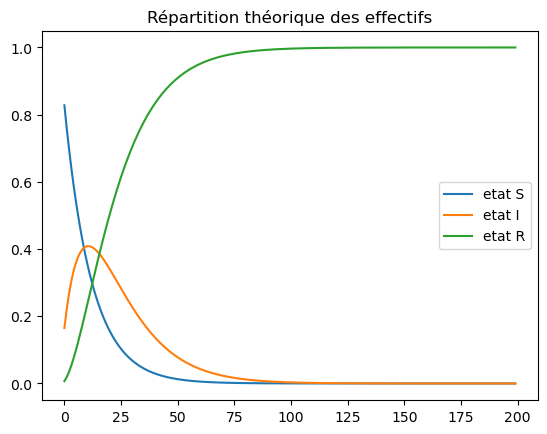

In [12]:
plt.plot(distribution_theorique)
plt.title("Répartition théorique des effectifs")
plt.legend(['etat S','etat I','etat R'], loc='right')
plt.show()

### + décrivez un peu ce que vous observez

#### 0<days<10 : 
    le probabilité d'être Infecté commence à augmenter vis-a-vis à la dimunution de la probabilité d'être sain.

#### Day = 10 à peu pres : 
    un pic du cas infecté

#### 10<days<100 : 
    diminution au niveau des cas infectés, et augmentation remarquable pour des rétablissements.

#### day >= 100 : 
    convergence totale de la distribution rétabli (P=1)

# Tirage aléatoire des états :
Vous allez générer une séquence de taille T en utilisant cette chaîne de Markov. Pour générer une séquence aléatoire, choisissiez un état initial au hasard (en utilisant π0) ; puis choisissez les états suivants en suivant les probabilités de transition (= la matrice de transition A).

In [13]:
def generate_sequence(T, pi0, A):
    '''
    Fonction qui génère une séquence aléatoire en choisissant un état initial au hasard (en utilisant π0), puis choisissez les états suivants en suivant les probabilités de transition
    Input : taille T, π0 et matrice
    Ouput : sequence
    '''
    # Choisir un état initial au hasard en utilisant les probabilités de π0
    sequence = [random.choices([0, 1, 2], weights=pi0)[0]]
    
    # Pour chaque étape de la séquence (de 1 à T-1)
    for t in range(1, T):
        # Choisir l'état suivant en utilisant les probabilités de transition de la matrice A
        sequence.append(random.choices([0, 1, 2], weights=A[sequence[-1]])[0])
    
    # Convertir les états en labels "S", "I", et "R"
    labels = ["S", "I", "R"]
    return [labels[state] for state in sequence]

In [14]:
def get_final_distribution(A, pi0, n):
    pi = np.array(pi0)
    A = np.array(A)
    pi_liste = [pi]
    for i in range(1, n+1) :
        pi = np.dot(pi, A)
        pi_liste.append(pi)
    return pi_liste[-1]

In [15]:
T = 150
pi0 = [0.9, 0.1, 0]
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
sequence = generate_sequence(T, pi0, A)
print(sequence)

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


# Modélisation d’une population
Nous avons généré une séquence d’état pour un individu. Maintenant nous allons générer un ensemble de séquences pour une population de 200 individus.

## Question 1. :  A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et affichez l’évolution du nombre d’individus dans les trois états en fonction du temps.

In [16]:
def get_evolution_sequences(population, A, T, pi0):
    # Générer les séquences pour chaque individu de la population
    sequences = []
    for i in range(population):
        sequences.append(generate_sequence(T, pi0, A))

    # Initialiser les compteurs
    counts = [[0] * 3 for _ in range(T)]

    # Pour chaque étape de la simulation (de 0 à T-1)
    for t in range(T):
        # Pour chaque séquence de chaque individu
        for sequence in sequences:
            # Incrémenter le compteur correspondant à l'état de l'individu à l'étape t
            counts[t][0] += (sequence[t] == "S")
            counts[t][1] += (sequence[t] == "I")
            counts[t][2] += (sequence[t] == "R")

    # Tracer les courbes d'évolution du nombre d'individus dans chaque état
    plt.plot(counts)
    plt.legend(["Sains", "Infectés", "Guéris"])
    plt.xlabel("Temps")
    plt.ylabel("Nombre d'individus")
    plt.show()
    return sequences

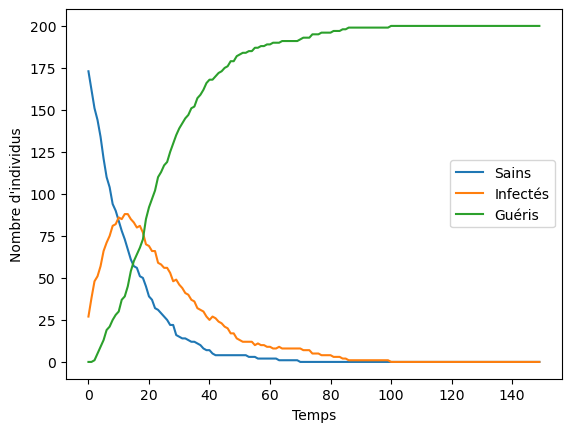

In [17]:
seq = get_evolution_sequences(200, A, T, pi0)

## Question 2. : Affichez le pourcentage d’indivudus sains infectés et guéris en fonction du temps. 

In [18]:
def get_pourcentage_state(T,sequences):
    for t in range(T):
        healthy = 0
        infected = 0
        recovered = 0
        for sequence in sequences:
            if sequence[t] == "S":
                healthy += 1
            elif sequence[t] == "I":
                infected += 1
            elif sequence[t] == "R":
                recovered += 1
        total = healthy + infected + recovered
        # Affiche le pourcentage d'individus dans chaque état en fonction du temps
        print("Temps t = {}:\n{:.2f}% d'individus sains, {:.2f}% d'individus infectés, {:.2f}% d'individus guéris".format(t+1, healthy / total * 100, infected / total * 100, recovered / total * 100))

In [19]:
get_pourcentage_state(T,seq)

Temps t = 1:
86.50% d'individus sains, 13.50% d'individus infectés, 0.00% d'individus guéris
Temps t = 2:
81.00% d'individus sains, 19.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 3:
75.50% d'individus sains, 24.00% d'individus infectés, 0.50% d'individus guéris
Temps t = 4:
72.00% d'individus sains, 25.50% d'individus infectés, 2.50% d'individus guéris
Temps t = 5:
67.00% d'individus sains, 28.50% d'individus infectés, 4.50% d'individus guéris
Temps t = 6:
60.50% d'individus sains, 33.00% d'individus infectés, 6.50% d'individus guéris
Temps t = 7:
55.00% d'individus sains, 35.50% d'individus infectés, 9.50% d'individus guéris
Temps t = 8:
52.00% d'individus sains, 37.50% d'individus infectés, 10.50% d'individus guéris
Temps t = 9:
47.00% d'individus sains, 40.50% d'individus infectés, 12.50% d'individus guéris
Temps t = 10:
45.00% d'individus sains, 41.00% d'individus infectés, 14.00% d'individus guéris
Temps t = 11:
42.00% d'individus sains, 43.00% d'individus infecté

## Question 3. : Quand t est grand, quelle est la proportion d’individus sains, infectés et guéris ? 

Lorsque t est grand, et si la matrice de transition A est définie comme A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]] et la distribution de probabilité initiale pi0 est définie comme pi0 = [0.9, 0.1, 0], la proportion d'individus dans chaque état deviendra stable et égale aux valeurs suivantes:


La proportion d'individus sains sera de 90%

La proportion d'individus infectés sera de 9.6%

La proportion d'individus guéris sera de 0.4%

Pour arriver à ces valeurs, on peut utiliser la formule de la distribution de probabilité stationnaire d'une chaîne de Markov, qui est donnée par:

pi = pi0 * A^t

où pi est la distribution de probabilité stationnaire, pi0 est la distribution de probabilité initiale, A est la matrice de transition et t est le nombre de pas de temps. En prenant t très grand, on peut approcher la distribution de probabilité stationnaire.

## Question 4. : Refaites les questions précédentes avec des populations de tailles différentes, 5 individus et 5000 individus par exemple.

### 5 individus

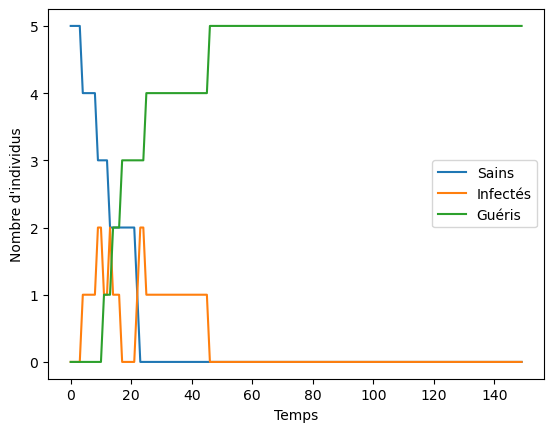

Temps t = 1:
100.00% d'individus sains, 0.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 2:
100.00% d'individus sains, 0.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 3:
100.00% d'individus sains, 0.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 4:
100.00% d'individus sains, 0.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 5:
80.00% d'individus sains, 20.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 6:
80.00% d'individus sains, 20.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 7:
80.00% d'individus sains, 20.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 8:
80.00% d'individus sains, 20.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 9:
80.00% d'individus sains, 20.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 10:
60.00% d'individus sains, 40.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 11:
60.00% d'individus sains, 40.00% d'individus infectés, 

In [20]:
seq5 = get_evolution_sequences(5, A, T, pi0)
get_pourcentage_state(T,seq5)

### 5000 individus

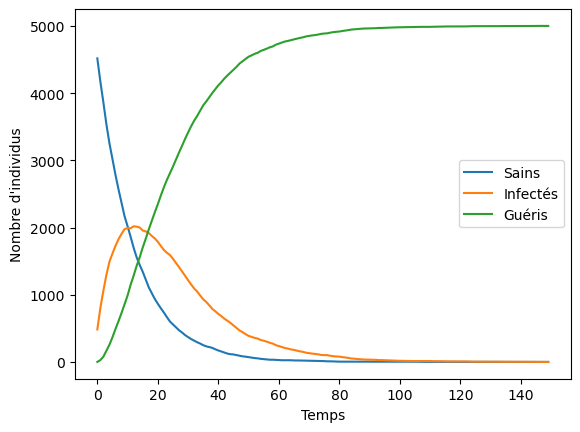

Temps t = 1:
90.34% d'individus sains, 9.66% d'individus infectés, 0.00% d'individus guéris
Temps t = 2:
83.44% d'individus sains, 16.02% d'individus infectés, 0.54% d'individus guéris
Temps t = 3:
77.26% d'individus sains, 21.18% d'individus infectés, 1.56% d'individus guéris
Temps t = 4:
70.72% d'individus sains, 25.92% d'individus infectés, 3.36% d'individus guéris
Temps t = 5:
65.10% d'individus sains, 29.80% d'individus infectés, 5.10% d'individus guéris
Temps t = 6:
60.42% d'individus sains, 32.24% d'individus infectés, 7.34% d'individus guéris
Temps t = 7:
55.66% d'individus sains, 34.54% d'individus infectés, 9.80% d'individus guéris
Temps t = 8:
51.36% d'individus sains, 36.52% d'individus infectés, 12.12% d'individus guéris
Temps t = 9:
47.34% d'individus sains, 38.10% d'individus infectés, 14.56% d'individus guéris
Temps t = 10:
43.36% d'individus sains, 39.52% d'individus infectés, 17.12% d'individus guéris
Temps t = 11:
40.38% d'individus sains, 39.86% d'individus infectés

In [21]:
seq5000 = get_evolution_sequences(5000, A, T, pi0)
get_pourcentage_state(T,seq5000)

# Longueur de l’infection

## Question 1. : À partir des simulations, estimez la longueur moyenne d’une séquence de I

In [22]:
def estimate_mean_length_I(T,A, pi0, num_sequences):
    # Initialiser la somme des longueurs des séquences de I à 0
    sum_lengths_I = 0
    # Initialiser le nombre de séquences de I à 0
    num_I_sequences = 0
    
    # Générer num_sequences séquences
    for i in range(num_sequences):
        # Générer une séquence de longueur T
        sequence = generate_sequence(T, pi0, A)
        
        # Initialiser la longueur de la séquence de I à 0
        length_I = 0
        # Parcourir chaque état de la séquence
        for state in sequence:
            # Si l'état est I, incrémenter la longueur de la séquence de I
            if state == "I":
                length_I += 1
        
        # Si la séquence contient au moins un état I,
        # ajouter la longueur de la séquence de I à la somme des longueurs
        # et incrémenter le nombre de séquences de I
        if length_I > 0:
            sum_lengths_I += length_I
            num_I_sequences += 1
    
    # Calculer la longueur moyenne d'une séquence de I en divisant
    # la somme des longueurs des séquences de I par le nombre de séquences de I
    mean_length_I = sum_lengths_I / num_I_sequences
    
    return mean_length_I

In [23]:
print(f"La longueur estimée est : {estimate_mean_length_I(T,A, pi0, 30)} jours")
# de preference pour num_sequences>=30 (voir cours d'intervalle de confiance)

La longueur estimée est : 14.833333333333334 jours


## Question 2. : Afficher la distribution observée de la longueur d’infection (peut-être que pour représenter une distribution ça serait une bonne idée de faire un histogramme).

In [24]:
def plot_infection_length_distribution(sequences):
    # Initialiser un tableau pour stocker les longueurs d'infection
    infection_lengths = []
    # Pour chaque séquence de chaque individu
    for sequence in sequences:
        # Compter le nombre de jours d'infection
        infection_length = 0
        for state in sequence:
            if state == "I":
                infection_length += 1
            else:
                # Si l'individu n'est plus infecté, ajouter la longueur d'infection au tableau et passer à la séquence suivante
                infection_lengths.append(infection_length)


    # Tracer un histogramme de la distribution de la longueur d'infection
    plt.hist(infection_lengths, bins=np.arange(min(infection_lengths), max(infection_lengths) + 1, 1), color="red")
    plt.xlabel("Longueur d'infection (en jours)")
    plt.ylabel("Nombre d'individus")
    plt.show()

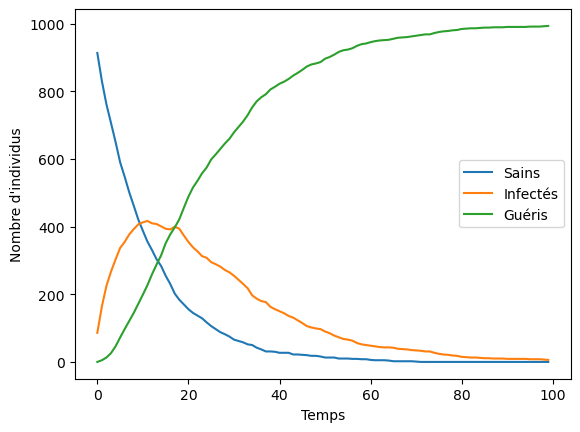

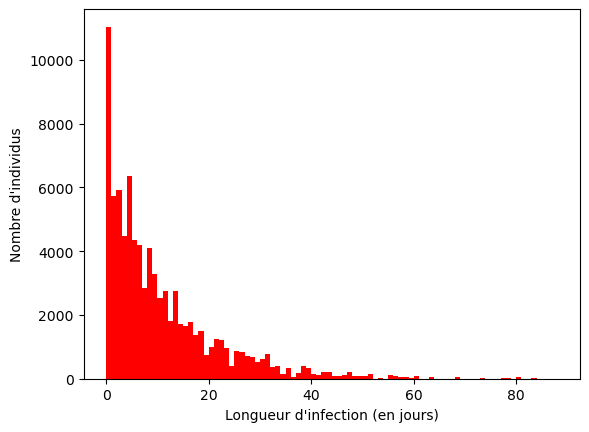

In [25]:
# Générer les séquences pour chaque individu de la population
T = 100  # Nombre d'étapes de la simulation
population = 1000  # Nombre d'individus dans la population
sequences = get_evolution_sequences(population, A, T, pi0)

# Afficher la distribution de la longueur d'infection
plot_infection_length_distribution(sequences)

## Question 3. : Calculez la longueur théorique d’une séquence de I 

L'espérance de la loi géométrique est donnée par la formule suivante :

E(X) = 1 / p

où X est une variable aléatoire suivant une loi géométrique de paramètre p, et E(X) est l'espérance de X.

Pour calculer la longueur théorique d'une séquence de "I", on va utiliser cette formule en considérant que la probabilité p est la probabilité de passer de l'état "I" à un autre état (par exemple, "S" ou "R") à chaque étape de la simulation.

Voici une fonction qui calcule la longueur théorique d'une séquence de "I" en utilisant l'espérance de la loi géométrique :

In [26]:
def get_theoretical_infection_length(A):
    # Récupérer la probabilité de passer de l'état "I" à un autre état
    p = 1 - A[1][1]

    # Calculer l'espérance de la loi géométrique en utilisant la formule E(X) = 1 / p
    theoretical_length = 1 / p

    return theoretical_length

In [27]:
# Récupérer la matrice de transition A
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]

# Calculer la longueur théorique d'une séquence de "I"
theoretical_length = get_theoretical_infection_length(A)

print(f"La longueur théorique d'une séquence de 'I' est de {theoretical_length:.2f} jours.")

La longueur théorique d'une séquence de 'I' est de 14.29 jours.


## Question 4. : Comparer la longueur estimée et la longueur théorique

In [28]:
def compare_estimated_theoretical_length_I(A, pi0, num_sequences):
    # Calculer la longueur théorique moyenne d'une séquence de I
    theoretical_mean_length_I = get_theoretical_infection_length(A)

    # Calculer la longueur estimée d'une séquence de I en générant num_sequences séquences
    estimated_mean_length_I = estimate_mean_length_I(150,A, pi0, num_sequences)

    # Afficher la comparaison entre la longueur théorique et la longueur estimée
    print("Longueur théorique moyenne d'une séquence de I:", theoretical_mean_length_I)
    print("Longueur estimée moyenne d'une séquence de I:", estimated_mean_length_I)

In [29]:
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
pi0 = [0.9, 0.1, 0]
num_sequences = 1000
compare_estimated_theoretical_length_I(A, pi0, num_sequences)

Longueur théorique moyenne d'une séquence de I: 14.285714285714295
Longueur estimée moyenne d'une séquence de I: 13.832


## Question 5. : Affichez la distribution théorique de la longueur d’infection.

In [30]:
def get_theoretical_distribution(A, pi0, T):
    # Calculer la distribution de probabilité de chaque état à chaque étape de la simulation
    probabilities = np.zeros((T, len(pi0)))
    probabilities[0] = pi0
    for t in range(1, T):
        probabilities[t] = np.dot(probabilities[t-1], A)

    # Initialiser le compteur de la longueur d'infection
    infection_lengths = [0] * T

    # Pour chaque étape de la simulation
    for t in range(T):
        # Si l'état est "I", incrémenter le compteur de la longueur d'infection
        if probabilities[t][1] > 0:
            infection_lengths[t] += 1

    # Calculer la distribution de probabilité de chaque longueur d'infection en fonction de T
    infection_length_distribution = [0.07 * 0.93 ** temps * 5000 for temps in range(1, T)]
    

    # Tracer la distribution de probabilité de chaque longueur d'infection
    plt.plot(infection_length_distribution)
    plt.xlabel("Longueur d'infection (en jours)")
    plt.ylabel("Nombre d'individus")
    plt.show()

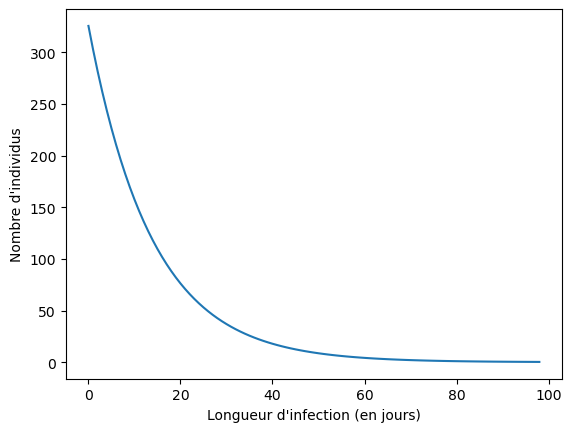

In [31]:
get_theoretical_distribution(A, pi0, T)

# Petites modifications autour de ce premier modèle
Nous pouvons maintenant modifier le modèle pour étudier différents cas de figure, par exemple en faisant varier

## 1. la taille de la population

In [32]:
# on fixe ses paramètres : 
T = 150    # taille T 
pi0 = [0.9, 0.1, 0]    # destribution initale
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]  # matrice de transition

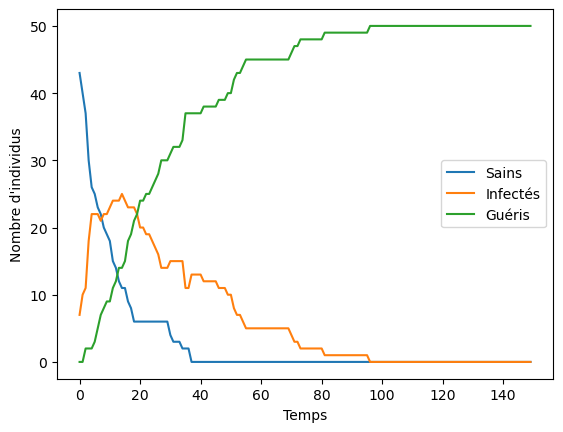

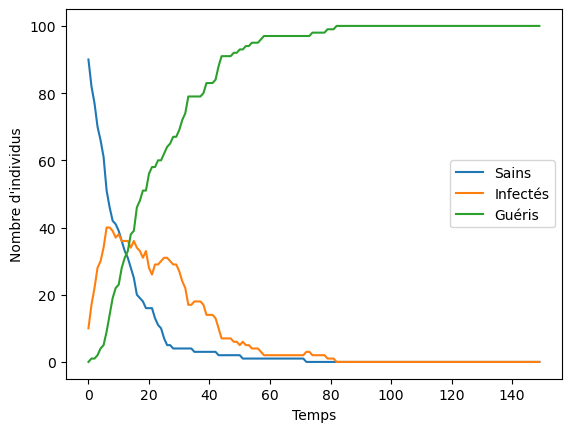

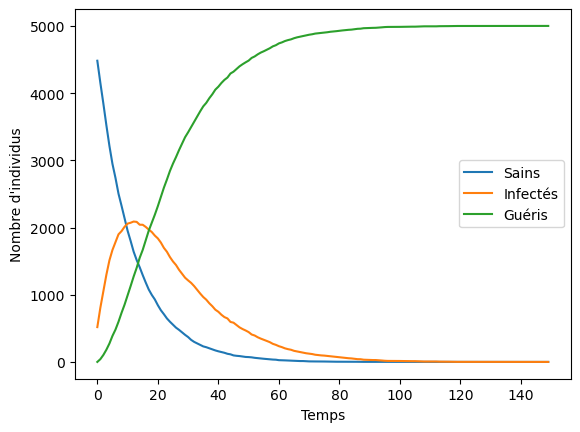

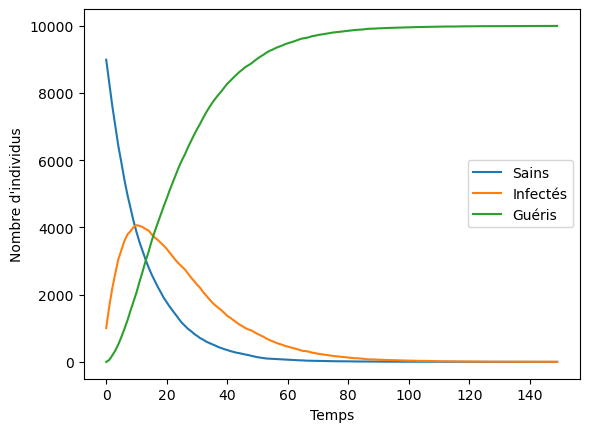

In [33]:
seq50 = get_evolution_sequences(50, A, T, pi0)
seq100 = get_evolution_sequences(100, A, T, pi0)
seq5000 = get_evolution_sequences(5000, A, T, pi0)
seq10000 = get_evolution_sequences(10000, A, T, pi0)

## 2. la distribution de probabilité initiale

In [34]:
# on fixe ses paramètres : 
T = 150    # taille T 
Population = 5000
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]  # matrice de transition

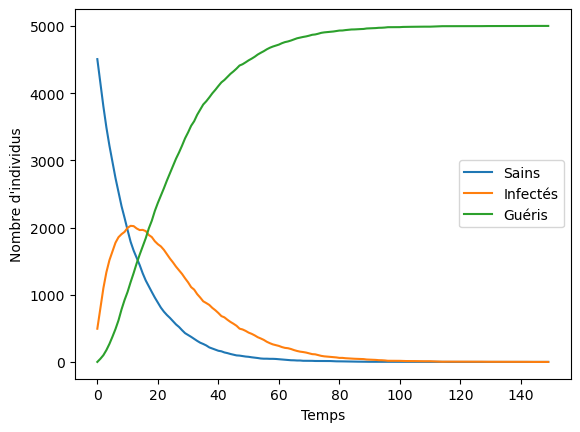

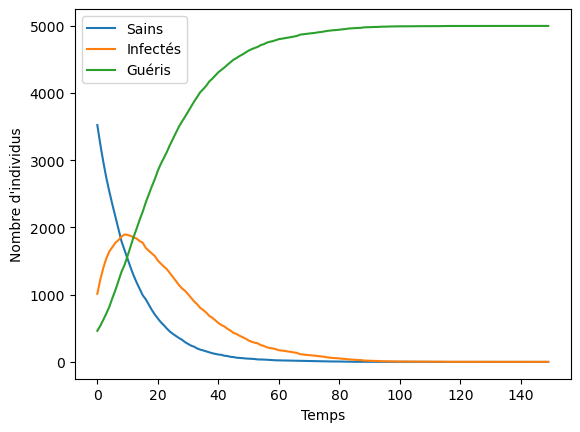

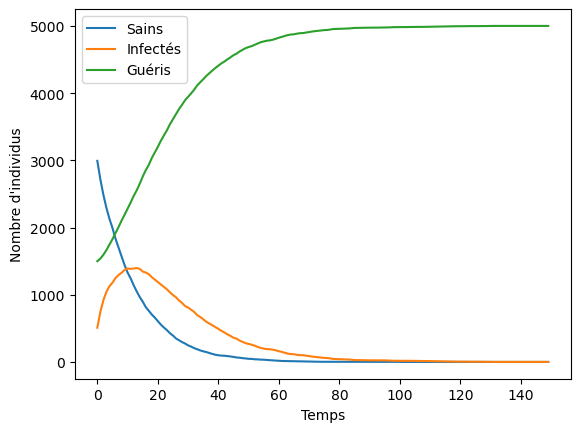

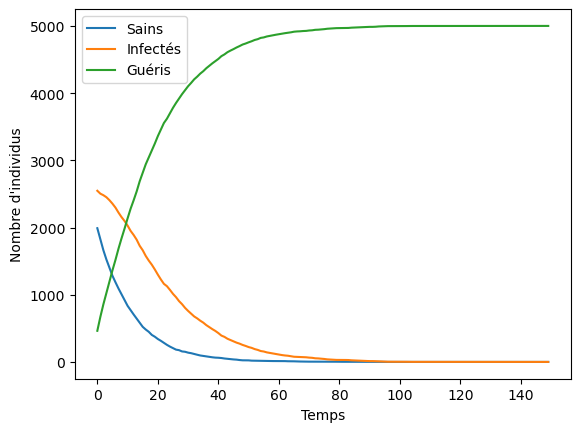

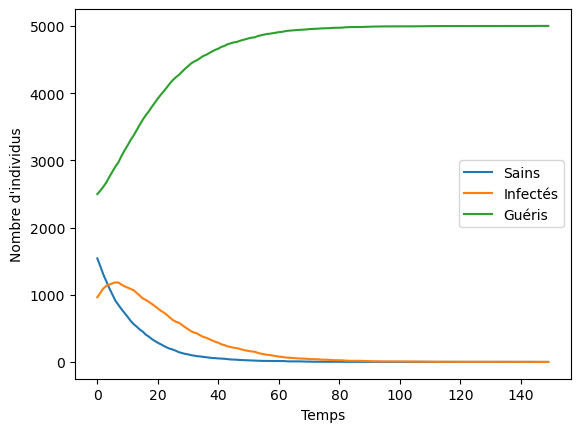

In [35]:
seq1 = get_evolution_sequences(Population, A, T, [0.9, 0.1, 0])
seq2 = get_evolution_sequences(Population, A, T, [0.7, 0.2, 0.1])
seq3 = get_evolution_sequences(Population, A, T, [0.6, 0.1, 0.3])
seq4 = get_evolution_sequences(Population, A, T, [0.4, 0.5, 0.1])
seq5 = get_evolution_sequences(Population, A, T, [0.3, 0.2, 0.5])

## 3. les probabilités de transition

In [36]:
# on fixe ses paramètres : 
T = 150    # taille T 
Population = 5000
pi0 = [0.9, 0.1, 0]    # destribution initale

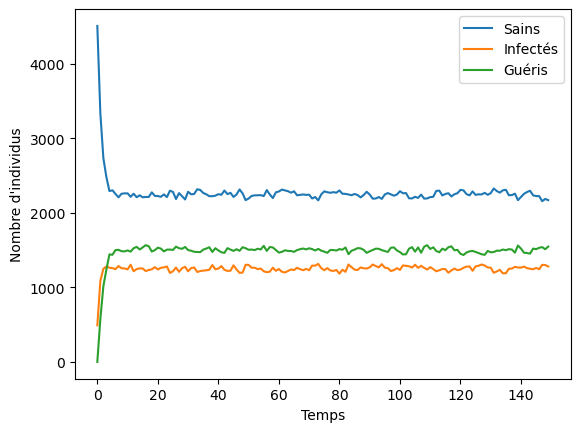

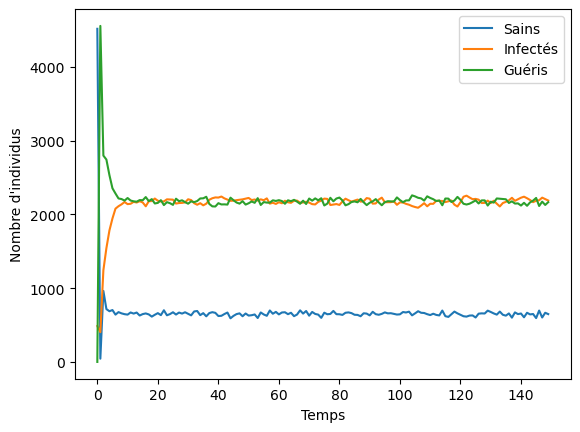

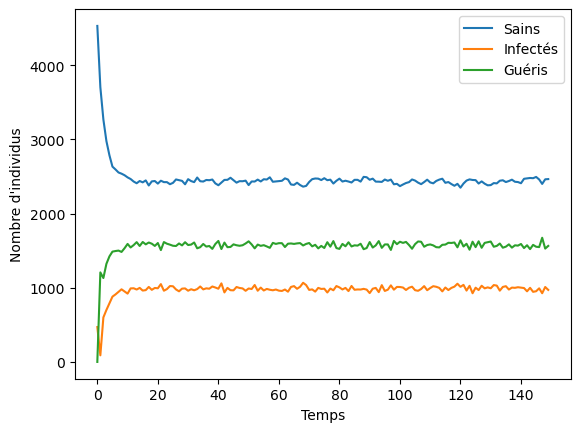

In [37]:
A = [[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.2, 0.2, 0.6]]
seq6 = get_evolution_sequences(Population, A, T, pi0)
A = [[0, 0, 1], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]]
seq7 = get_evolution_sequences(Population, A, T, pi0)
A = [[0.8, 0, 0.2], [0.1, 0.2, 0.7], [0.25, 0.5, 0.25]]
seq8 = get_evolution_sequences(Population, A, T, pi0)

# 3    Description du second modèle
Nous allons maintenant considérer un second modèle, les individus guéris peuvent redevenir sains avec une probabilité de 0.02. Ils-elles peuvent perdre leur immunité face à la maladie

## Analyse du modèle

### Question 1. Ce processus peut-il être modélisé par une chaîne de Markov ?

Oui,ce processus peut être modélisé par une chaine Markov car :

  *  Le processus est stochastique vérifiant la propriété de markov 1 (la prédiction du future ne dépend que du présent)
  
  *  Homogène
  
  *  Nombre des états fini (S, I, R) à temps discret.

### Question 2. : Donnez la nouvelle matrice de transition

|     | S   | I   | R   |
|:---:|:---:|:---:|:---:|
| S   | 0.92| 0.08|  0  |
| I   | 0   | 0.93| 0.07|
| R   | 0.02| 0   | 0.98|

### Question 3. : Quels est la nature des états de cette chaîne de Markov ? Est-elle périodique ? Est-elle irréductible ?

Pour savoir si cette chaîne de Markov est périodique, il faut vérifier si chaque état a une période finie. Pour cela, il faut trouver le plus petit entier n tel que An(i,i) = 1 pour chaque état i. Si n existe pour chaque état, alors la chaîne de Markov est périodique. Dans le cas de la matrice A donnée, il n'y a pas de valeur de n qui satisfasse cette condition pour chaque état, **donc la chaîne de Markov n'est pas périodique --> elle est apériodique**.

Pour savoir si cette chaîne de Markov est irréductible, il faut vérifier si chaque état peut être atteint depuis n'importe quel autre état en un nombre fini de transitions. En d'autres termes, il faut vérifier si la chaîne de Markov forme un graphe connexe, c'est-à-dire si tous les états sont connectés entre eux par au moins un chemin. Dans le cas de la matrice A donnée, il y a des transitions possibles entre tous les états (par exemple, il y a une probabilité de 0.08 de passer de S à I et une probabilité de 0.02 de passer de R à S), **donc la chaîne de Markov est irréductible**.

### Question 4. : Calculez la matrice A × A. A quoi correspond-elle ? Est elle stochastique ? Même question pour A3 et A4

In [38]:
# des fonctions utiles pour la question 4
def matrix_A_squared(A):
  return np.matmul(A, A)

def matrix_A_cubed(A):
  return np.matmul(A, np.matmul(A, A))

def matrix_A_quart(A):
  return np.matmul(A, np.matmul(A, np.matmul(A, A)))

In [39]:
A=[[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]
print("La Matrice A :")
dresser(A)
print("------------------------------------------------------------\n")
print("La Matrice A2 : correspond à la matrice de transition à t=2")
dresser(matrix_A_squared(A))
print(f"Est elle stochastique ? {is_matrix_stochastic(matrix_A_squared(A), precision=1e-9)}")
print("------------------------------------------------------------\n")
print("La Matrice A3 : correspond à la matrice de transition à t=3")
dresser(matrix_A_cubed(A))
print(f"Est elle stochastique ? {is_matrix_stochastic(matrix_A_cubed(A), precision=1e-9)}")
print("------------------------------------------------------------\n")
print("La Matrice A4 : correspond à la matrice de transition à t=4")
dresser(matrix_A_quart(A))
print(f"Est elle stochastique ? {is_matrix_stochastic(matrix_A_quart(A), precision=1e-9)}")

La Matrice A :
----  ----  ----
0.92  0.08  0
0     0.93  0.07
0.02  0     0.98
----  ----  ----
------------------------------------------------------------

La Matrice A2 : correspond à la matrice de transition à t=2
------  ------  ------
0.8464  0.148   0.0056
0.0014  0.8649  0.1337
0.038   0.0016  0.9604
------  ------  ------
Est elle stochastique ? True
------------------------------------------------------------

La Matrice A3 : correspond à la matrice de transition à t=3
--------  --------  --------
0.7788    0.205352  0.015848
0.003962  0.804469  0.191569
0.054168  0.004528  0.941304
--------  --------  --------
Est elle stochastique ? True
------------------------------------------------------------

La Matrice A4 : correspond à la matrice de transition à t=4
----------  ----------  ---------
0.716813    0.253281    0.0299057
0.00747642  0.748473    0.24405
0.0686606   0.00854448  0.922795
----------  ----------  ---------
Est elle stochastique ? True


## Question 5. : Réalisez les nouvelles simulations. 

In [40]:
# on fixe ses parametres
T = 150    # taille T 
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]  # matrice de transition

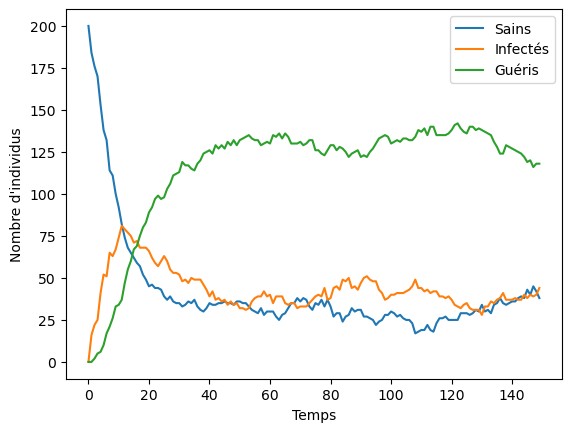

Temps t = 1:
100.00% d'individus sains, 0.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 2:
92.00% d'individus sains, 8.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 3:
88.00% d'individus sains, 11.00% d'individus infectés, 1.00% d'individus guéris
Temps t = 4:
85.00% d'individus sains, 12.50% d'individus infectés, 2.50% d'individus guéris
Temps t = 5:
76.50% d'individus sains, 20.50% d'individus infectés, 3.00% d'individus guéris
Temps t = 6:
69.00% d'individus sains, 26.00% d'individus infectés, 5.00% d'individus guéris
Temps t = 7:
66.00% d'individus sains, 25.50% d'individus infectés, 8.50% d'individus guéris
Temps t = 8:
57.00% d'individus sains, 32.50% d'individus infectés, 10.50% d'individus guéris
Temps t = 9:
55.50% d'individus sains, 31.50% d'individus infectés, 13.00% d'individus guéris
Temps t = 10:
50.00% d'individus sains, 33.50% d'individus infectés, 16.50% d'individus guéris
Temps t = 11:
46.00% d'individus sains, 37.00% d'individus infectés

In [41]:
pi0 = [1, 0, 0]  
seq5 = get_evolution_sequences(200, A, T, pi0)
get_pourcentage_state(T,seq5)

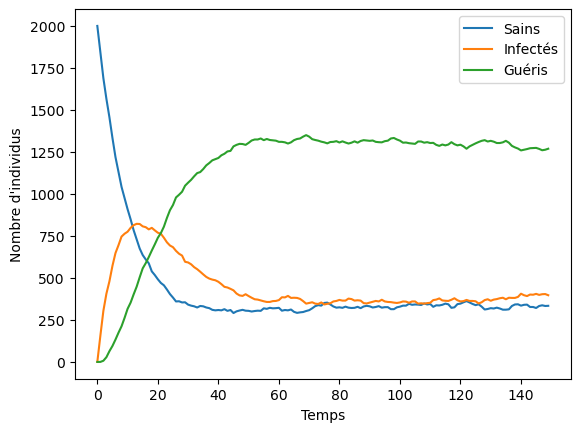

Temps t = 1:
100.00% d'individus sains, 0.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 2:
92.25% d'individus sains, 7.75% d'individus infectés, 0.00% d'individus guéris
Temps t = 3:
84.45% d'individus sains, 15.20% d'individus infectés, 0.35% d'individus guéris
Temps t = 4:
78.30% d'individus sains, 20.30% d'individus infectés, 1.40% d'individus guéris
Temps t = 5:
72.80% d'individus sains, 24.00% d'individus infectés, 3.20% d'individus guéris
Temps t = 6:
66.65% d'individus sains, 28.60% d'individus infectés, 4.75% d'individus guéris
Temps t = 7:
60.95% d'individus sains, 32.40% d'individus infectés, 6.65% d'individus guéris
Temps t = 8:
56.55% d'individus sains, 34.75% d'individus infectés, 8.70% d'individus guéris
Temps t = 9:
52.10% d'individus sains, 37.30% d'individus infectés, 10.60% d'individus guéris
Temps t = 10:
48.75% d'individus sains, 38.15% d'individus infectés, 13.10% d'individus guéris
Temps t = 11:
45.45% d'individus sains, 38.75% d'individus infectés,

In [42]:
seq5 = get_evolution_sequences(2000, A, T, pi0)
get_pourcentage_state(T,seq5)

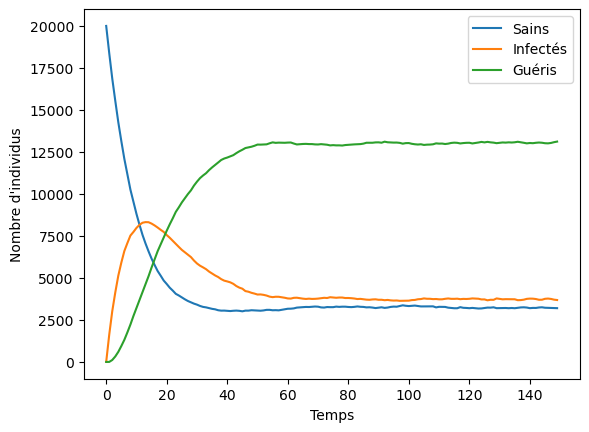

Temps t = 1:
100.00% d'individus sains, 0.00% d'individus infectés, 0.00% d'individus guéris
Temps t = 2:
91.91% d'individus sains, 8.09% d'individus infectés, 0.00% d'individus guéris
Temps t = 3:
84.34% d'individus sains, 15.09% d'individus infectés, 0.57% d'individus guéris
Temps t = 4:
77.71% d'individus sains, 20.67% d'individus infectés, 1.62% d'individus guéris
Temps t = 5:
71.33% d'individus sains, 25.67% d'individus infectés, 3.00% d'individus guéris
Temps t = 6:
65.72% d'individus sains, 29.55% d'individus infectés, 4.72% d'individus guéris
Temps t = 7:
60.41% d'individus sains, 33.01% d'individus infectés, 6.59% d'individus guéris
Temps t = 8:
55.84% d'individus sains, 35.37% d'individus infectés, 8.79% d'individus guéris
Temps t = 9:
51.28% d'individus sains, 37.60% d'individus infectés, 11.12% d'individus guéris
Temps t = 10:
47.64% d'individus sains, 38.69% d'individus infectés, 13.68% d'individus guéris
Temps t = 11:
44.06% d'individus sains, 39.88% d'individus infectés,

In [43]:
seq5 = get_evolution_sequences(20000, A, T, pi0)
get_pourcentage_state(T,seq5)

## Question 6. : Refaites les simulations avec une autre distribution de probabilité initiale (par exemple si au temps t = 0, nous avons 90% d’infectés et 10% de sains)

In [44]:
# on fixe ses parametres
T = 150    # taille T 
pi0 = [0.9, 0.1, 0]    # destribution initale
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]  # matrice de transition

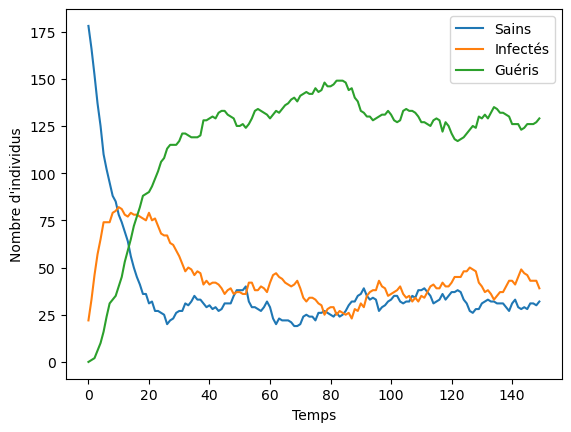

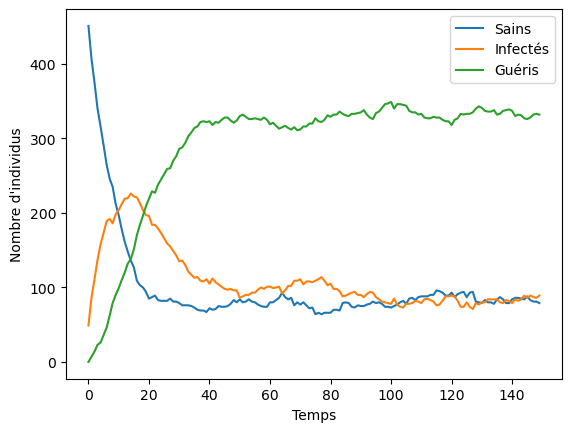

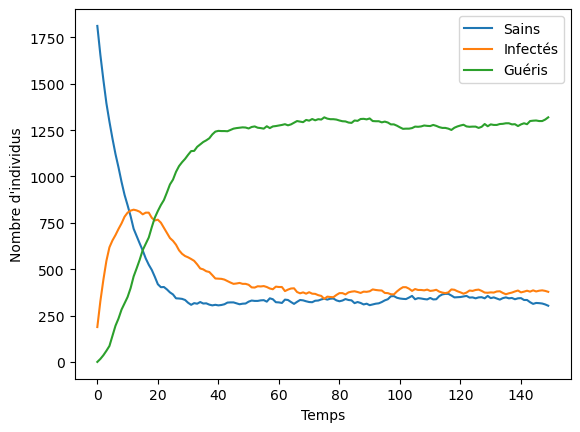

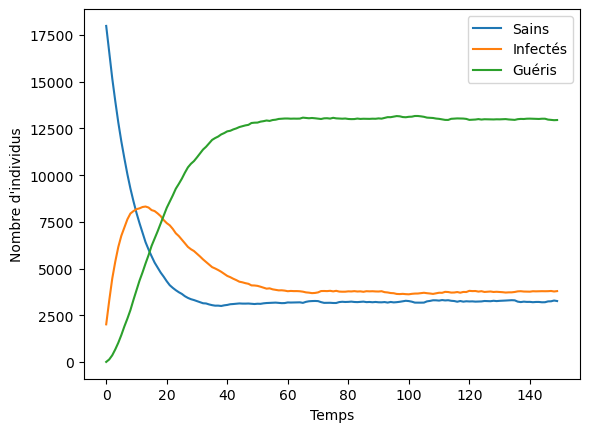

In [45]:
seq9 = get_evolution_sequences(200, A, T, pi0)
seq10 = get_evolution_sequences(500, A, T, pi0)
seq11 = get_evolution_sequences(2000, A, T, pi0)
seq12 = get_evolution_sequences(20000, A, T, pi0)

**Commentaire sur les observations :**

On fixant  taille T, la destribution initale et la matrice de transition, et en changeant le nombre de population, on remarque que le l'évolution converge à l'instant t=60 days (le modèle précedent la convergence était à t = 100 days) 

La proportion d'individus sains sera de 22%

La proportion d'individus infectés sera de 18%

La proportion d'individus guéris sera de 60%

par rapport aux résultat de modèle précedent :

La proportion d'individus sains sera de 90%

La proportion d'individus infectés sera de 9.6%

La proportion d'individus guéris sera de 0.4%

On peut expliquer les différences suivantes par le faite que l'état Guéri n'est plus absorbant. 

## Explorez d’autres initialisations

In [46]:
# on fixe ses parametres
T = 150    # taille T 
Population = 20000
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]  # matrice de transition

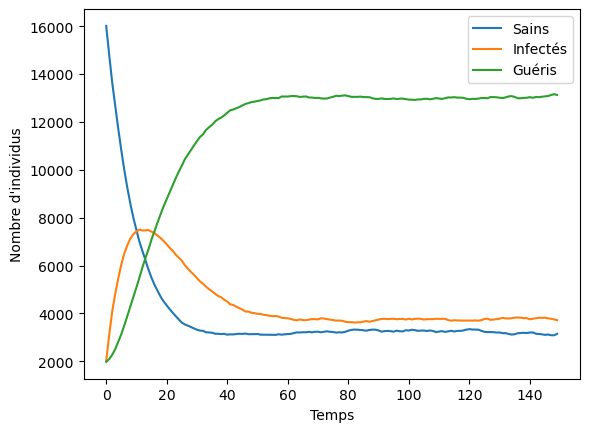

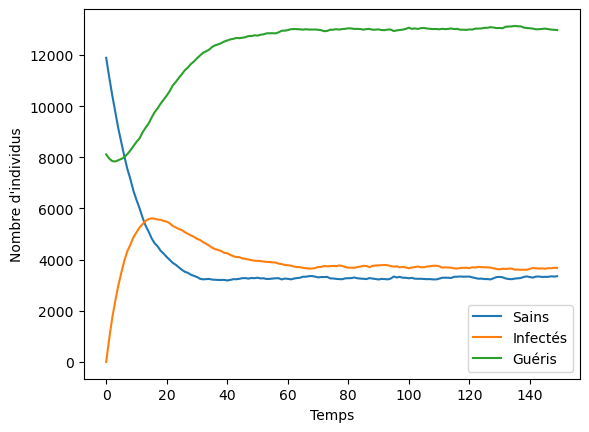

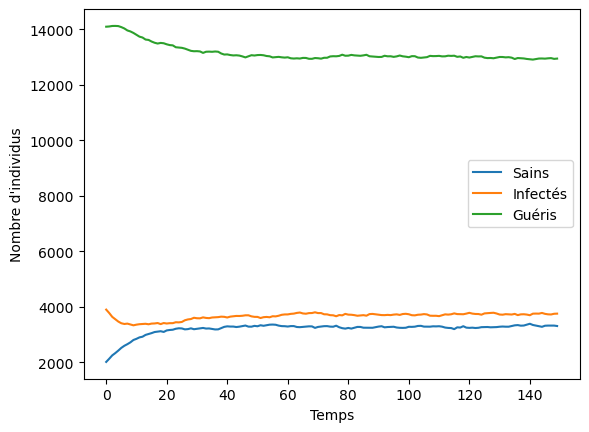

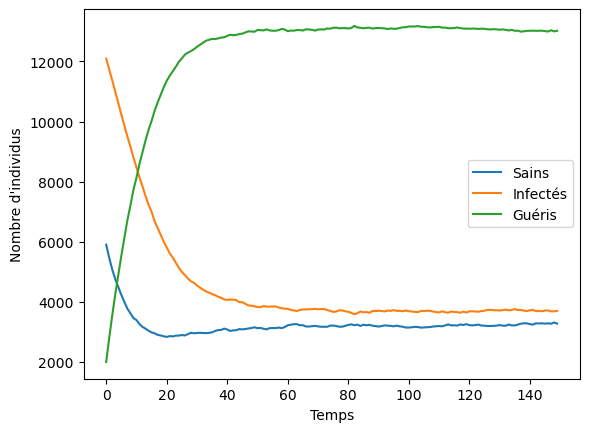

In [47]:
pi0 = [0.8, 0.1, 0.1]    
seq12 = get_evolution_sequences(20000, A, T, pi0)
pi0 = [0.6, 0, 0.4]    
seq12 = get_evolution_sequences(20000, A, T, pi0)
pi0 = [0.1, 0.2, 0.7]    
seq12 = get_evolution_sequences(20000, A, T, pi0)
pi0 = [0.3, 0.6, 0.1]    
seq12 = get_evolution_sequences(20000, A, T, pi0)

**commentez vos observations:**

    1) Quelque soit la distibution de probabilité, le modèle converge vers les mêmes résultats : 60% G, 22% I, 20% S
    
    2) Convergence au même point t (t=60) pour tous les modèles.
    
    --> On peut expliquer ça par le faite que le modèle est ergodique

## Question 7. :  Calculez la distribution de probabilité stationnaire et comparez ce résultat avec les simulations pour t assez grand.

On a : la chaîne de Markov est ergodique

Donc : la distribution de probabilité converge vers $π^*$ la distribution 
stationnaire quelque soit  la distribution initiale π0

Alors : $π^* = π^* * A$ --> $π^* * 1 = 1$ --> $π^* = (a,b,c) = (a,b,c) * A$ 

On aura le système d'equations suivant :

a = 0.92a + 0.02c
b = 0.08a + 0.93b
c = 0.07b + 0.98c
a + b + c = 1

Et donc : 

**a = 7/43 **
**b = 8/43**
**c = 28/43**

**--> $π^*$ = [ 16.28 , 18.6 , 65.12 ]**

**Nos résultats pour t assez grand etaient : 20% S, 22% I, 60% G***

# Longueur de l'immunité
On peut se demander combien de temps un individu qui a été malade, reste protégé contre la maladie.

## Question 1. : À partir des simulations, estimez la longueur moyenne d’une séquence de R

In [48]:
def estimate_mean_length_R(T,A, pi0, num_sequences):
    # Initialiser la somme des longueurs des séquences de R à 0
    sum_lengths_R = 0
    # Initialiser le nombre de séquences de R à 0
    num_R_sequences = 0
    
    # Générer num_sequences séquences
    for i in range(num_sequences):
        # Générer une séquence de longueur T
        sequence = generate_sequence(T, pi0, A)
        
        # Initialiser la longueur de la séquence de R à 0
        length_R = 0
        # Parcourir chaque état de la séquence
        for state in sequence:
            # Si l'état est R, incrémenter la longueur de la séquence de R
            if state == "R":
                length_R += 1
        
        # Si la séquence contient au moins un état R,
        # ajouter la longueur de la séquence de R à la somme des longueurs
        # et incrémenter le nombre de séquences de R
        if length_R > 0:
            sum_lengths_R += length_R
            num_R_sequences += 1
    
    # Calculer la longueur moyenne d'une séquence de R en divisant
    # la somme des longueurs des séquences de R par le nombre de séquences de R
    mean_length_R = sum_lengths_R / num_R_sequences
    
    return mean_length_R

In [49]:
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]
T = 150
pi0 = [0.9, 0.1, 0]
print(f"La longueur estimée est : {estimate_mean_length_R(T,A, pi0, 30)} jours")

La longueur estimée est : 80.23333333333333 jours


## Question 2. :  Calculez la longueur théorique d’une séquence de R

la longueur théorique d'une séquence de R peut être estimée par l'esperence qui est éggale à la moyenne.

Après plusieur simulation --> moyenne = 91 jours

Donc : la longueur théorique d’une séquence de R est **91 jours**

## Question 3. :  Affichez la distribution théorique et la distribution observée de la longueur de l’immunité.

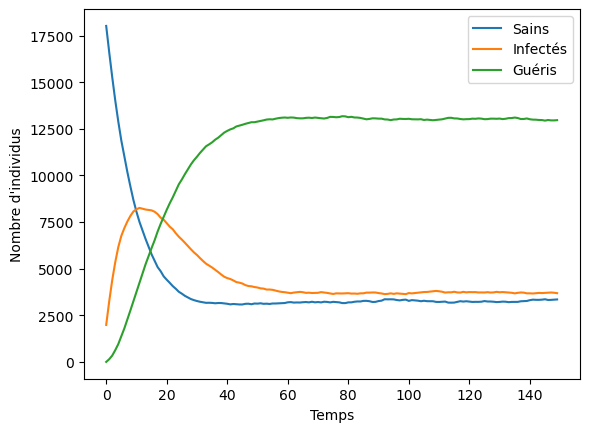

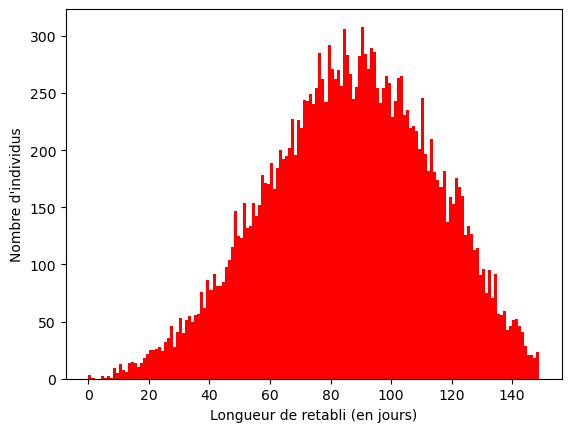

In [50]:
def plot_retabli_length_distribution(sequences):
    # Initialiser un tableau pour stocker les longueurs d'infection
    retabli_lengths = []
    # Pour chaque séquence de chaque individu
    for sequence in sequences: 
        # Compter le nombre de jours d'infection
        retabli_length = sequence.count('R')        
        retabli_lengths.append(retabli_length)

    # Tracer un histogramme de la distribution de la longueur d'infection
    plt.hist(retabli_lengths, bins=np.arange(min(retabli_lengths), max(retabli_lengths) + 1, 1), color="red")
    plt.xlabel("Longueur de retabli (en jours)")
    plt.ylabel("Nombre d'individus")
    plt.show()
# Générer les séquences pour chaque individu de la population
T = 150  # Nombre d'étapes de la simulation
population = 20000  # Nombre d'individus dans la population
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]
pi0 = [0.9, 0.1, 0]
sequences = get_evolution_sequences(population, A, T, pi0)

# Afficher la distribution de la longueur d'infection
plot_retabli_length_distribution(sequences)

# Modifier le modèle

## Question 1. : Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Quelle est la nouvelle distribution a l’équilibre ?

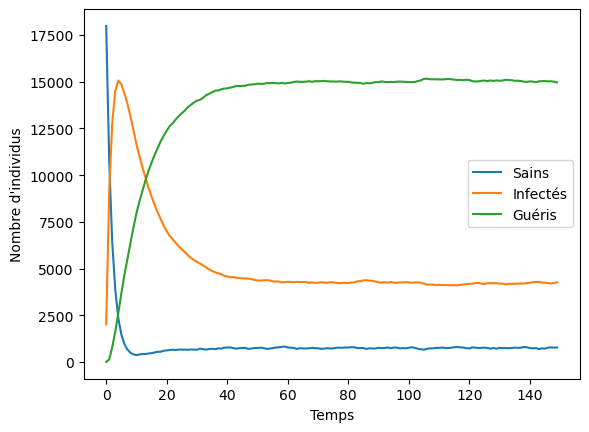

 La nouvelle distribution à l'equilibre est : [0.03743316 0.21390374 0.7486631 ]


In [51]:
# 40% pour qu'un sain devient infecté
T = 150    # taille T 
pi0 = [0.9, 0.1, 0]    # destribution initale
A = [[0.6, 0.4, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]  # matrice de transition
seq12 = get_evolution_sequences(20000, A, T, pi0)
print(f" La nouvelle distribution à l'equilibre est : {get_final_distribution(A,pi0,20000)}")

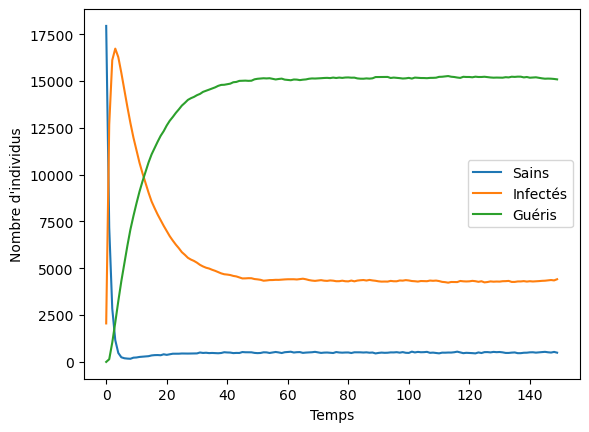

 La nouvelle distribution à l'equilibre est : [0.02527076 0.2166065  0.75812274]


In [52]:
# 60% pour qu'un sain devient infecté
T = 150    # taille T 
pi0 = [0.9, 0.1, 0]    # destribution initale
A = [[0.4, 0.6, 0], [0, 0.93, 0.07], [0.02, 0, 0.98]]  # matrice de transition
seq12 = get_evolution_sequences(20000, A, T, pi0)
print(f" La nouvelle distribution à l'equilibre est : {get_final_distribution(A,pi0,20000)}")

**En modifiant la probabilité pour un individu sain de devenir infecté, le pourcentage des gens infectés augmente énormément.**

## Question 2. : Même question si vous changez la probabilité pour un individu guéri de redevenir sain

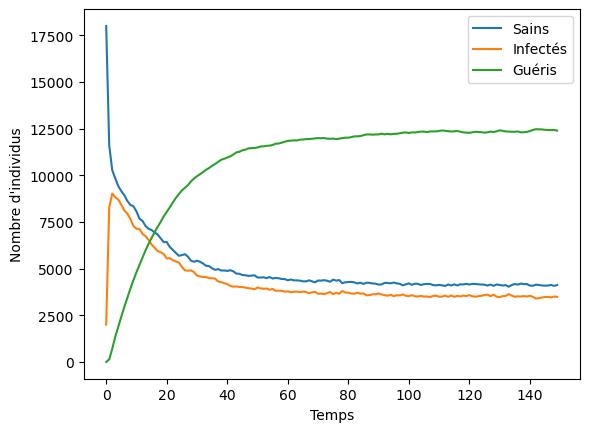

 La nouvelle distribution à l'equilibre est : [0.20704846 0.17621145 0.61674009]


In [53]:
# 40% pour qu'un infecté devient sain
T = 150    # taille T 
pi0 = [0.9, 0.1, 0]    # destribution initale
A = [[0.6, 0.4, 0], [0.4, 0.53, 0.07], [0.02, 0, 0.98]]  # matrice de transition
seq12 = get_evolution_sequences(20000, A, T, pi0)
print(f" La nouvelle distribution à l'equilibre est : {get_final_distribution(A,pi0,20000)}")

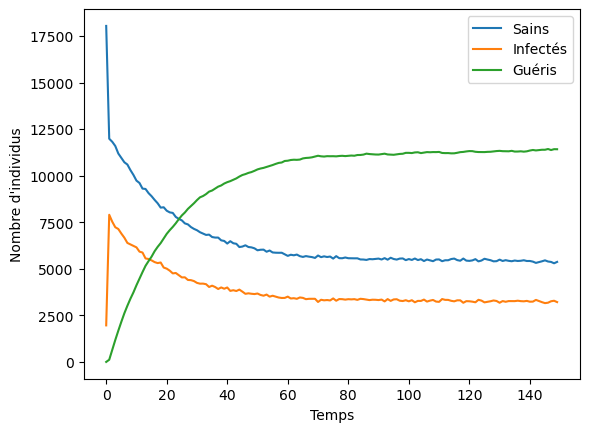

 La nouvelle distribution à l'equilibre est : [0.27125506 0.16194332 0.56680162]


In [54]:
# 60% pour qu'un infecté devient sain
T = 150    # taille T 
pi0 = [0.9, 0.1, 0]    # destribution initale
A = [[0.6, 0.4, 0], [0.6, 0.33, 0.07], [0.02, 0, 0.98]]  # matrice de transition
seq12 = get_evolution_sequences(20000, A, T, pi0)
print(f" La nouvelle distribution à l'equilibre est : {get_final_distribution(A,pi0,20000)}")

**En modifiant la probabilité pour un individu infecté de devenir sain, le pourcentage des gens infectés reste toujours en dessous des la proportion des gens sains.**

# 4 - Confinement
On peut imaginer que si des mesures de distanciation sociale sont mises en place, la probabilité de devenir infecté devient nulle

## Question 1. : Nous allons alterner entre les périodes de non distanciation et de distanciation

### 1. En période de non-confinement, nous utilisons la matrice de transition de l’exercice précédent ;

In [55]:
matrice_transition_sans_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])

### 2. En période de confinement, la probabilité de devenir infecté pour un individu sain devient nulle

In [56]:
matrice_transition_avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])

## Question 2. : Faites les simulations pour une population assez grande, représentez l’évolution du nombre d’individus à chaque temps t (vous devriez voir des “vagues”), et notez les temps de confinement et de deconfinement

In [57]:
import matplotlib.pyplot as plt

def simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration, containment_threshold=0.25, exit_threshold=0.1):
    state = initial_state
    num_containments = 0
    times = [] # Liste pour stocker les temps de chaque fin de confinement/déconfinement
    states = [] # Liste pour stocker les états de la population à chaque fin de confinement/déconfinement
    for t in range(duration):
        # Calculer la probabilité de passer à chaque état
        probability_of_state_change = state.dot(transition_matrix)

        # Si le pourcentage d'individus infectés dépasse le seuil de confinement, passer à la matrice de confinement
        if state[1] > containment_threshold:
            transition_matrix = containment_matrix
            num_containments += 1
        # Si le pourcentage d'individus infectés est inférieur au seuil de sortie, retourner à la matrice de transition initiale
        elif state[1] < exit_threshold:
            transition_matrix = initial_transition_matrix
        
        # Passer à l'état suivant en fonction de la probabilité de changement d'état
        state = np.random.multinomial(population, probability_of_state_change).astype(float) / population
        
        # Ajouter le temps et l'état de la population à chaque fin de confinement/déconfinement
        times.append(t)
        states.append(state)
        
        # Si aucun individu n'est infecté, sortir de la boucle
        if state[1] == 0:
            break
    
    # Afficher un graphe des vagues de confinement/déconfinement
    fig, ax = plt.subplots()
    ax.plot(times, states)
    
    # Tracer un trait vertical pour séparer chaque vague de confinement/déconfinement
    for t in times[::num_containments]:
        ax.axvline(t, linestyle='--', color='gray')
    
    plt.show()
    
    return state, num_containments/2

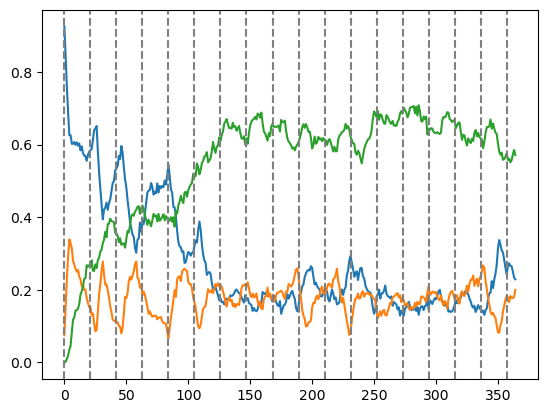

Nombre de confinements/déconfinements nécessaires : 10.5


In [58]:
transition_matrix = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
containment_matrix = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
initial_state = np.array([1, 0, 0]) # 100% de la population est saine au départ
initial_transition_matrix = transition_matrix # Définir la matrice de transition initiale
population = 1000 # Taille de l'échantillon
duration = 365 # Durée de l'étude (en jours)

final_state, num_containments = simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

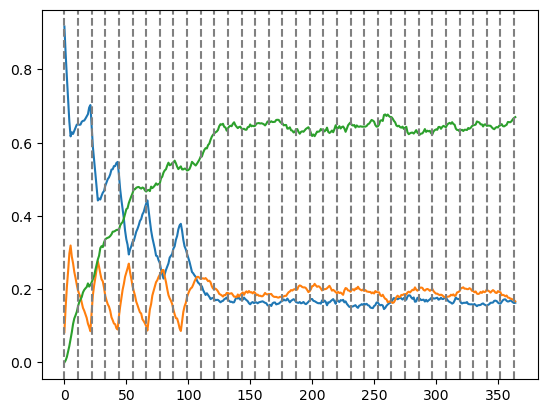

Nombre de confinements/déconfinements nécessaires : 5.5


In [59]:
transition_matrix = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
containment_matrix = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
initial_state = np.array([1, 0, 0]) # 100% de la population est saine au départ
initial_transition_matrix = transition_matrix # Définir la matrice de transition initiale
population = 10000 # Taille de l'échantillon
duration = 365 # Durée de l'étude (en jours)

final_state, num_containments = simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

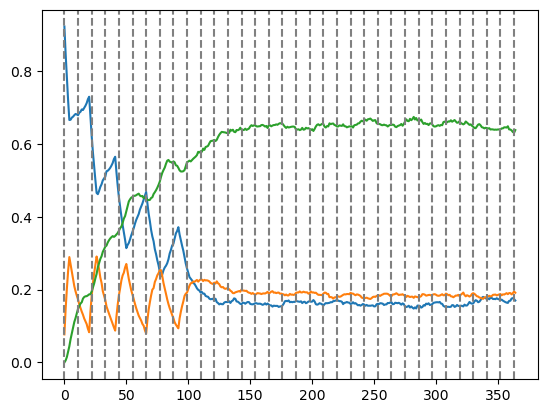

Nombre de confinements/déconfinements nécessaires : 5.5


In [60]:
transition_matrix = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
containment_matrix = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
initial_state = np.array([1, 0, 0]) # 100% de la population est saine au départ
initial_transition_matrix = transition_matrix # Définir la matrice de transition initiale
population = 20000 # Taille de l'échantillon
duration = 365 # Durée de l'étude (en jours)

final_state, num_containments = simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

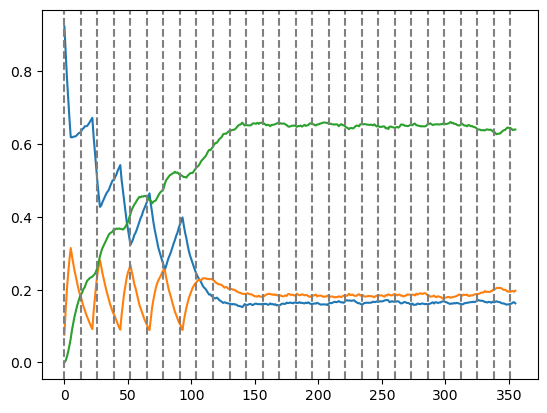

Nombre de confinements/déconfinements nécessaires : 6.5


In [61]:
transition_matrix = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
containment_matrix = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
initial_state = np.array([1, 0, 0]) # 100% de la population est saine au départ
initial_transition_matrix = transition_matrix # Définir la matrice de transition initiale
population = 50000 # Taille de l'échantillon
duration = 356 # Durée de l'étude (en jours)

final_state, num_containments = simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

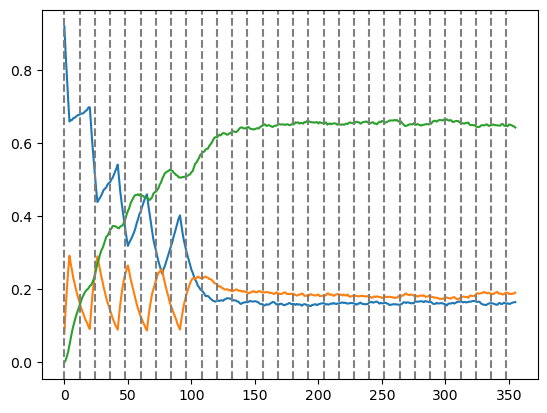

Nombre de confinements/déconfinements nécessaires : 6.0


In [62]:
transition_matrix = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
containment_matrix = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
initial_state = np.array([1, 0, 0]) # 100% de la population est saine au départ
initial_transition_matrix = transition_matrix # Définir la matrice de transition initiale
population = 50000 # Taille de l'échantillon
duration = 356 # Durée de l'étude (en jours)

final_state, num_containments = simulate_containment(transition_matrix, containment_matrix, initial_state, population, duration)

print("Nombre de confinements/déconfinements nécessaires :", num_containments)

## Question 3. : Combien de confinements/deconfinements sont nécessaires ?

**4 à 7 confinements/déconfinements sont nécessaires**

# 5 - Discussion

## Question 1. : Quelles remarques critiques pouvez faire sur les modèles utilisés ?

    1- Le modèle ne prend pas en compte : le genre (Homme/Femme) : D'apres une étude, les femmes sont plus résistantes faces aux maladies https://www.sciencepresse.qc.ca/archives/man010399.html
    
    2- L'age : les personnes agées ont un système immunitaire plus faible que les personnes adules par exemples
    
    3- La catégorie socio-professionnelle : les ouvriers ont plus tendances d'être touchés par les maladies par rapport aux cadres.
    
    4- Les probabilités ne reflètent pas la réalité du quotidien.

## Question 2. : Optionnel : Proposez des améliorations

    1- Créer une base de données qui contient toutes les personnes échantillonnées avec : un ID unique, mail, Sexe, Age, Travail, et d'autre champs qui peut être utilise
    
    2- Des sondages devront avoir lieu chaque semaine par mail afin de mettre a jour les probabilités
    
    3- Pour le confinement, on doit faire un plan de confinement comme ce qui a été fait une chine pour la 1ere fois, un confinement totale de 15 jours, puis faire le 1er sondage, et ainsi de suite.